In [193]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

/kaggle/input/caltech101-airplanes-motorbikes-schooners/caltech101_classification/airplanes/image_0612.jpg
/kaggle/input/caltech101-airplanes-motorbikes-schooners/caltech101_classification/airplanes/image_0755.jpg
/kaggle/input/caltech101-airplanes-motorbikes-schooners/caltech101_classification/airplanes/image_0178.jpg
/kaggle/input/caltech101-airplanes-motorbikes-schooners/caltech101_classification/airplanes/image_0777.jpg
/kaggle/input/caltech101-airplanes-motorbikes-schooners/caltech101_classification/airplanes/image_0073.jpg
/kaggle/input/caltech101-airplanes-motorbikes-schooners/caltech101_classification/airplanes/image_0123.jpg
/kaggle/input/caltech101-airplanes-motorbikes-schooners/caltech101_classification/airplanes/image_0770.jpg
/kaggle/input/caltech101-airplanes-motorbikes-schooners/caltech101_classification/airplanes/image_0219.jpg
/kaggle/input/caltech101-airplanes-motorbikes-schooners/caltech101_classification/airplanes/image_0270.jpg
/kaggle/input/caltech101-airplanes-mo

In [194]:
#importing libraries such as numpy, matplotlib, keras, tensorflow, sklearn,seaborn, random, tqdm
import numpy as np
import matplotlib.pyplot as plot
from matplotlib import style
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import *
from sklearn.metrics import *
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import *
import tensorflow as tf
from keras import backend as K
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
import random as rn
import cv2                  
import numpy as np  
from tqdm import tqdm                  
from random import shuffle  
from zipfile import ZipFile
from PIL import Image
import time 


In [195]:
#Function for creating the train data for various image class
imagearr=[]
labelarr=[]
sz_image=150
dire="../input/caltech101-airplanes-motorbikes-schooners/caltech101_classification" 
pathMb=os.path.join(dire,'Motorbikes')
pathairP=os.path.join(dire,'airplanes')
pathsch=os.path.join(dire,'schooner')
def lbl_asgn(image,image_type):
    return image_type
def train_create(DIR,image_type):
    for image in tqdm(os.listdir(DIR)):
        lbl=lbl_asgn(image,image_type)            
        path = os.path.join(DIR,image)
        image = cv2.imread(path,cv2.IMREAD_COLOR)
        image = cv2.resize(image, (sz_image,sz_image))     #Resizing images to a common size
        
        imagearr.append(np.array(image))
        labelarr.append(str(lbl))

print("Motorbikes:")
train_create(pathMb,'Motorbikes')
print("Airplanes:")
train_create(pathairP,'airplanes')
print("Schooner:")
train_create(pathsch,'schooner')



Motorbikes:


100%|██████████| 798/798 [00:01<00:00, 613.25it/s]


Airplanes:


100%|██████████| 800/800 [00:01<00:00, 571.49it/s]


Schooner:


100%|██████████| 63/63 [00:00<00:00, 526.67it/s]


In [196]:
le=LabelEncoder()
Y=le.fit_transform(labelarr)
Y=to_categorical(Y,5)
imagearr=np.array(imagearr)
imagearr=imagearr/255

In [197]:
#Splitting into train and test data
x_train,x_test,y_train,y_test=train_test_split(imagearr,Y,test_size=0.25,random_state=42)

In [198]:
np.random.seed(42)
rand.seed(42)
tf.random.set_seed(42)

In [199]:
#Case 1 with 2 layers 
#Building CNN model using 2 convolutional layers, kernel size of (4,4) (2,2) and activation function relu, softmax in dense
# Reference:https://pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/#pyis-cta-modal
model = tf.keras.Sequential()

#1st layer
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (4,4),strides=(1, 1),
    padding='valid',activation ='relu', input_shape = (150,150,3) ))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2) ))

#2nd layer
model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (2,2),strides=(1, 1),
    padding='valid',activation ='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(1,1)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))

In [200]:
# Image data generator function 
# Reference: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
batch_size=60
epochs=3
datagen = ImageDataGenerator(
        featurewise_center=False, 
        samplewise_center=False,  
        featurewise_std_normalization=False,
        samplewise_std_normalization=False, 
        zca_whitening=False,  
        rotation_range=0,  
        zoom_range = 0.0, 
        width_shift_range=0.2,  
        height_shift_range=0.2,  
        horizontal_flip=True, 
        vertical_flip=False  
        shear_range=0.0,
        channel_shift_range=0.0,
        fill_mode='nearest',
        cval=0.0,
        rescale=None,
        preprocessing_function=None,
        dtype=None)

datagen.fit(x_train)

In [201]:
model.compile(optimizer='sgd',loss='mse',metrics=['accuracy'])


In [202]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_57 (Conv2D)           (None, 147, 147, 32)      1568      
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 72, 72, 64)        8256      
_________________________________________________________________
max_pooling2d_58 (MaxPooling (None, 71, 71, 64)        0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 322624)            0         
_________________________________________________________________
dense_30 (Dense)             (None, 512)               165184000 
_________________________________________________________________
activation_15 (Activation)   (None, 512)             

In [203]:
# Model prediction
# Reference:https://pyimagesearch.com/2018/12/24/how-to-use-keras-fit-and-fit_generator-a-hands-on-tutorial/
Prediction = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test))

Epoch 1/3
21/21 [==============================] - 27s 1s/step - loss: 0.1102 - accuracy: 0.5141 - val_loss: 0.0917 - val_accuracy: 0.6082
Epoch 2/3
21/21 [==============================] - 26s 1s/step - loss: 0.0904 - accuracy: 0.6731 - val_loss: 0.0903 - val_accuracy: 0.5817
Epoch 3/3
21/21 [==============================] - 26s 1s/step - loss: 0.0904 - accuracy: 0.6378 - val_loss: 0.0815 - val_accuracy: 0.7404


In [204]:

Model_Accuracy1=model.evaluate(x_test, y_test)[1]*100
print("The accuracy of the model for case 1: {0:.2f}%".format(Model_Accuracy1))


13/13 [==============================] - 3s 198ms/step - loss: 0.0815 - accuracy: 0.7404
The accuracy of the model for case 1: 74.04%


In [205]:
#Case2 with 3 layers
#Building CNN model using 2 convolutional layers, kernel size of (4,4) (2,2) and activation function relu, softmax in dense
# Reference:https://pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/#pyis-cta-modal

model = tf.keras.Sequential()

#1st layer
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (4,4),strides=(1, 1),
    padding='valid',activation ='relu', input_shape = (150,150,3) ))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2) ))

#2nd layer
model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (2,2),strides=(1, 1),
    padding='valid',activation ='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(1,1)))
 
#3rd layer
model.add(tf.keras.layers.Conv2D(filters =96, kernel_size = (2,2),strides=(1, 1),
    padding='valid',activation ='relu' ))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(1,1)))


model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))

In [206]:
# Image data generator function 
# Reference: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
batch_size=60
epochs=3
datagen = ImageDataGenerator(
        featurewise_center=False, 
        samplewise_center=False,  
        featurewise_std_normalization=False,
        samplewise_std_normalization=False, 
        zca_whitening=False,  
        rotation_range=0,  
        zoom_range = 0.0, 
        width_shift_range=0.2,  
        height_shift_range=0.2,  
        horizontal_flip=True, 
        vertical_flip=False  
        shear_range=0.0,
        channel_shift_range=0.0,
        fill_mode='nearest',
        cval=0.0,
        rescale=None,
        preprocessing_function=None,
        dtype=None)

datagen.fit(x_train)

In [207]:
model.compile(optimizer='sgd',loss='mse',metrics=['accuracy'])


In [208]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_59 (Conv2D)           (None, 147, 147, 32)      1568      
_________________________________________________________________
max_pooling2d_59 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 72, 72, 64)        8256      
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 71, 71, 64)        0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 70, 70, 96)        24672     
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 69, 69, 96)        0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 457056)          

In [209]:
# Model prediction
# Reference:https://pyimagesearch.com/2018/12/24/how-to-use-keras-fit-and-fit_generator-a-hands-on-tutorial/
Predictions = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test))

Epoch 1/4
21/21 [==============================] - 45s 2s/step - loss: 0.1190 - accuracy: 0.4723 - val_loss: 0.1001 - val_accuracy: 0.7548
Epoch 2/4
21/21 [==============================] - 44s 2s/step - loss: 0.0951 - accuracy: 0.6659 - val_loss: 0.0867 - val_accuracy: 0.6370
Epoch 3/4
21/21 [==============================] - 45s 2s/step - loss: 0.0848 - accuracy: 0.7253 - val_loss: 0.0876 - val_accuracy: 0.6370
Epoch 4/4
21/21 [==============================] - 44s 2s/step - loss: 0.0813 - accuracy: 0.7157 - val_loss: 0.0680 - val_accuracy: 0.8221


In [210]:

Model_Accuracy2=model.evaluate(x_test, y_test)[1]*100
print("The accuracy of the model for case 2: {0:.2f}%".format(Model_Accuracy2))


13/13 [==============================] - 3s 256ms/step - loss: 0.0680 - accuracy: 0.8221
The accuracy of the model for case 2: 82.21%


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


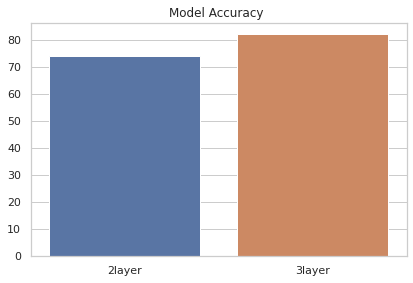

In [214]:
#Making a bar plot of the accuracy across the 3 test cases
# float(format(test_acc1))
plot.title('Model Accuracy ')
test_cases=['2layer','3layer']
test_accuracy=[float(format(Model_Accuracy1)),float(format(Model_Accuracy2))]
sns.barplot(test_cases,test_accuracy)
# plot.bar(test_cases,test_accuracy, color='blue', align='center', width=0.4)

plot.show()